In [1]:
from Library.DataAnalyzer import DataAnalyzer
from Library.DataPreprocessor import DataPreprocessor
from Library.DataVisualizer import DataVisualizer
from Library.ClassificationEngine import ClassificationEngine

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import pandas as pd

In [2]:
preprocessor = DataPreprocessor()
analyzer = DataAnalyzer()
visualizer = DataVisualizer()
trainer = ClassificationEngine()

# Define classification algorithms
g = GaussianNB()
b = BernoulliNB()
k = KNeighborsClassifier()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
h = GradientBoostingClassifier()

# Add the algorithms you define to the array
myAlgorithmArray = [g, b, k, l, d, r, h] 

# Read File

In [3]:
df = pd.read_csv("Data/LoansTrainingSet.csv")

# Exploratory Data Analysis

In [4]:
df.shape

(256984, 19)

In [5]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [6]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [8]:
analyzer.calculateNullValuesSum(df)

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [9]:
df.sample(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
247294,f64d12ef-ca6c-461f-9567-5d17dd7c2674,763ff646-c0d3-435c-af51-8fcb7517ab7b,Fully Paid,9874,Short Term,738.0,1 year,Home Mortgage,81362.0,Debt Consolidation,"$1,179.75",25.0,NaN,14,0,25856,28135,0.0,0.0
111527,6ec3cd62-d9c0-45f5-9c94-538955730d80,a48f640b-4e18-415d-afc8-9d0785288e93,Charged Off,21075,Long Term,717.0,8 years,Home Mortgage,55726.0,Debt Consolidation,$715.15,14.2,NaN,12,0,7740,22967,0.0,0.0
171874,aae77382-de46-4c59-8da0-1625ed3350d2,517f03dc-8997-4388-88b0-13565ab6e16b,Fully Paid,99999999,Short Term,714.0,3 years,Own Home,45628.0,Debt Consolidation,"$1,296.60",11.2,34.0,11,0,6313,8340,0.0,0.0
41342,292e7baa-a714-43b6-ac7f-ce23813b30ec,7f2eb19c-3418-42b3-afba-fed0ed2778e9,Fully Paid,14301,Short Term,NaN,10+ years,Home Mortgage,NaN,Debt Consolidation,"$2,157.24",28.4,9.0,14,0,44223,67105,0.0,0.0
84720,542694c1-6c3e-4891-b6ee-ca97142b5e54,f60084ff-b287-4084-a698-bbd79b88a780,Fully Paid,11748,Short Term,731.0,10+ years,Home Mortgage,41118.0,Debt Consolidation,$503.70,14.1,NaN,4,0,17765,22234,0.0,0.0


In [10]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [12]:
df = preprocessor.dropColumnsFromDataFrame(df, ["Loan ID", "Customer ID"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   256984 non-null  object 
 1   Current Loan Amount           256984 non-null  int64  
 2   Term                          256984 non-null  object 
 3   Credit Score                  195308 non-null  float64
 4   Years in current job          245508 non-null  object 
 5   Home Ownership                256984 non-null  object 
 6   Annual Income                 195308 non-null  float64
 7   Purpose                       256984 non-null  object 
 8   Monthly Debt                  256984 non-null  object 
 9   Years of Credit History       256984 non-null  float64
 10  Months since last delinquent  116601 non-null  float64
 11  Number of Open Accounts       256984 non-null  int64  
 12  Number of Credit Problems     256984 non-nul

In [14]:
analyzer.filterRowsByColumnRange(df, "Credit Score", 801, df["Credit Score"].max())

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
6,Charged Off,24613,Long Term,6640.0,6 years,Rent,49225.0,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
55,Charged Off,6463,Short Term,7320.0,1 year,Own Home,25248.0,Debt Consolidation,$633.29,19.9,74.0,9,0,8025,24317,0.0,0.0
71,Charged Off,6007,Short Term,7180.0,10+ years,Home Mortgage,43052.0,Debt Consolidation,$538.15,23.6,13.0,6,0,5077,7811,0.0,0.0
73,Charged Off,12899,Long Term,6670.0,2 years,Rent,133947.0,Debt Consolidation,"$1,931.07",18.4,7.0,16,0,39417,90199,0.0,0.0
79,Charged Off,5060,Short Term,7270.0,< 1 year,Home Mortgage,62738.0,Other,$711.03,20.4,22.0,6,0,10777,12041,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256946,Charged Off,20658,Short Term,7450.0,10+ years,Rent,45963.0,Debt Consolidation,$792.86,17.4,NaN,10,0,13192,36143,0.0,0.0
256948,Charged Off,20492,Short Term,7220.0,5 years,Rent,52511.0,Debt Consolidation,"$1,163.99",19.0,NaN,12,0,18732,24391,0.0,0.0
256952,Charged Off,12262,Long Term,7410.0,NaN,Home Mortgage,40872.0,Debt Consolidation,$705.04,16.5,NaN,11,0,13892,22775,0.0,0.0
256977,Charged Off,11953,Short Term,7170.0,10+ years,Home Mortgage,39844.0,Debt Consolidation,$982.82,11.7,NaN,9,1,4176,4783,1.0,0.0


In [15]:
df = preprocessor.updateColumnValuesBasedOnCondition(df, "Credit Score", "moreThan", 800, df["Credit Score"]%10, df["Credit Score"])

In [16]:
analyzer.filterRowsByColumnRange(df, "Credit Score", 801, df["Credit Score"].max())

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


In [17]:
analyzer.calculateNullValuesSum(df)

Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [18]:
analyzer.findColumnsWithMissingValuesAboveThreshold(df, 10)

[('Credit Score', 23.999937739314507),
 ('Annual Income', 23.999937739314507),
 ('Months since last delinquent', 54.627136319770884)]

In [19]:
df = preprocessor.updateColumnValuesBasedOnCondition(df, "Credit Score", "isnull", any, df["Credit Score"].median(), df["Credit Score"])

In [20]:
analyzer.calculateNullValuesSum(df)

Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                         0
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [21]:
d = {"Fully Paid": 1, "Charged Off":0}
df["Loan Status"] = df["Loan Status"].map(d).fillna(df["Loan Status"])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   256984 non-null  int64  
 1   Current Loan Amount           256984 non-null  int64  
 2   Term                          256984 non-null  object 
 3   Credit Score                  256984 non-null  float64
 4   Years in current job          245508 non-null  object 
 5   Home Ownership                256984 non-null  object 
 6   Annual Income                 195308 non-null  float64
 7   Purpose                       256984 non-null  object 
 8   Monthly Debt                  256984 non-null  object 
 9   Years of Credit History       256984 non-null  float64
 10  Months since last delinquent  116601 non-null  float64
 11  Number of Open Accounts       256984 non-null  int64  
 12  Number of Credit Problems     256984 non-nul

In [23]:
analyzer.sortCorrelationsWithColumn(df, "Loan Status")

Loan Status                     1.000000
Credit Score                    0.404574
Current Loan Amount             0.269804
Annual Income                   0.070328
Years of Credit History         0.035548
Months since last delinquent    0.023541
Number of Open Accounts         0.020787
Tax Liens                       0.012585
Number of Credit Problems       0.010179
Current Credit Balance          0.008838
Bankruptcies                    0.001154
Name: Loan Status, dtype: float64

Non-numeric columns not included in the correlation heatmap:
Column Name
--------------------
Term
Years in current job
Home Ownership
Purpose
Monthly Debt
Maximum Open Credit


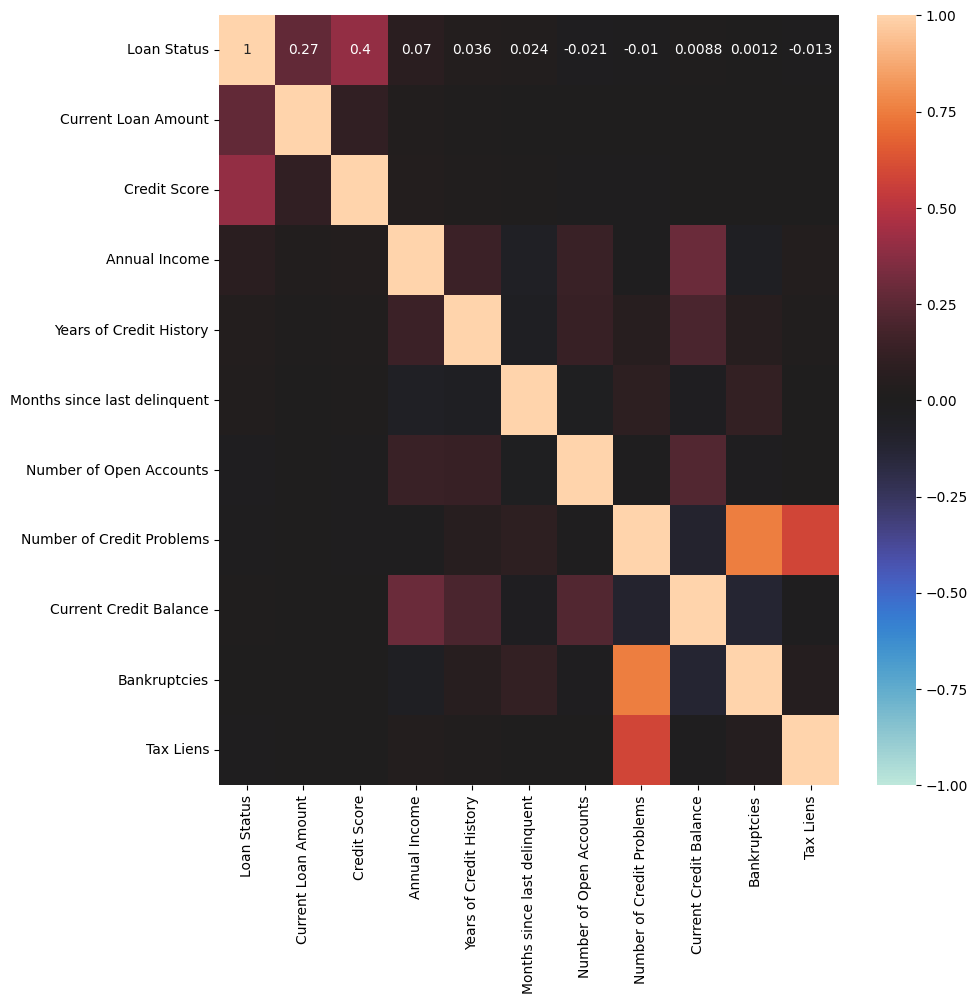

(<Axes: >, None)

In [24]:
visualizer.plotCorrelationHeatmap(df, 10, 10)

In [25]:
df = preprocessor.fillMissingAndConvertType(df, "Annual Income", int, "median")

In [26]:
analyzer.calculateNullValuesSum(df)

Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                         0
Years in current job             11476
Home Ownership                       0
Annual Income                        0
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [27]:
analyzer.sortCorrelationsWithColumn(df, "Loan Status")

Loan Status                     1.000000
Credit Score                    0.404574
Current Loan Amount             0.269804
Annual Income                   0.061182
Years of Credit History         0.035548
Months since last delinquent    0.023541
Number of Open Accounts         0.020787
Tax Liens                       0.012585
Number of Credit Problems       0.010179
Current Credit Balance          0.008838
Bankruptcies                    0.001154
Name: Loan Status, dtype: float64

In [28]:
df = preprocessor.removeOutliersByQuantile(df, "Annual Income", .05, .95)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231287 entries, 0 to 256983
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   231287 non-null  int64  
 1   Current Loan Amount           231287 non-null  int64  
 2   Term                          231287 non-null  object 
 3   Credit Score                  231287 non-null  float64
 4   Years in current job          222336 non-null  object 
 5   Home Ownership                231287 non-null  object 
 6   Annual Income                 231287 non-null  int32  
 7   Purpose                       231287 non-null  object 
 8   Monthly Debt                  231287 non-null  object 
 9   Years of Credit History       231287 non-null  float64
 10  Months since last delinquent  105725 non-null  float64
 11  Number of Open Accounts       231287 non-null  int64  
 12  Number of Credit Problems     231287 non-nul

In [30]:
analyzer.calculateNullValuesSum(df)

Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                         0
Years in current job              8951
Home Ownership                       0
Annual Income                        0
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    125562
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       443
Tax Liens                           15
dtype: int64

In [31]:
df.sample()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
73543,1,28843,Long Term,725.0,10+ years,Home Mortgage,64486,Debt Consolidation,"$1,214.49",24.0,NaN,12,0,26548,64127,0.0,0.0


In [32]:
df = preprocessor.extractAndConcatenateNumbers(df, ["Years in current job"])

In [33]:
df["Years in current job"].value_counts() 

10    73061
1     32896
2     20659
3     18450
5     16164
4     14519
6     13373
7     12871
8     11178
9      9165
       8951
Name: Years in current job, dtype: int64

In [34]:
analyzer.calculateNullValuesSum(df)

Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                         0
Years in current job                 0
Home Ownership                       0
Annual Income                        0
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    125562
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       443
Tax Liens                           15
dtype: int64

In [35]:
analyzer.sortCorrelationsWithColumn(df, "Loan Status")

Loan Status                     1.000000
Credit Score                    0.396816
Current Loan Amount             0.264744
Annual Income                   0.077751
Years of Credit History         0.032778
Number of Open Accounts         0.029007
Months since last delinquent    0.025316
Tax Liens                       0.012367
Number of Credit Problems       0.007889
Current Credit Balance          0.004250
Bankruptcies                    0.003551
Name: Loan Status, dtype: float64

In [36]:
df.Purpose.value_counts()

Debt Consolidation      185056
Home Improvements        13037
other                    12448
Other                     8437
Business Loan             4048
Buy a Car                 2824
Medical Bills             2526
Take a Trip               1398
Buy House                 1316
Educational Expenses       197
Name: Purpose, dtype: int64

In [37]:
df = preprocessor.updateColumnValuesBasedOnCondition(df, "Purpose", "equals", "other", "Other", df["Purpose"])

In [38]:
df.Purpose.value_counts()


Debt Consolidation      185056
Other                    20885
Home Improvements        13037
Business Loan             4048
Buy a Car                 2824
Medical Bills             2526
Take a Trip               1398
Buy House                 1316
Educational Expenses       197
Name: Purpose, dtype: int64

In [39]:
df = preprocessor.updateColumnValuesBasedOnCondition(df, "Months since last delinquent", "isnull", any, df["Months since last delinquent"].median(), df["Months since last delinquent"])

In [40]:
analyzer.calculateNullValuesSum(df)

Loan Status                       0
Current Loan Amount               0
Term                              0
Credit Score                      0
Years in current job              0
Home Ownership                    0
Annual Income                     0
Purpose                           0
Monthly Debt                      0
Years of Credit History           0
Months since last delinquent      0
Number of Open Accounts           0
Number of Credit Problems         0
Current Credit Balance            0
Maximum Open Credit               0
Bankruptcies                    443
Tax Liens                        15
dtype: int64

In [41]:
analyzer.sortCorrelationsWithColumn(df, "Loan Status")

Loan Status                     1.000000
Credit Score                    0.396816
Current Loan Amount             0.264744
Annual Income                   0.077751
Years of Credit History         0.032778
Number of Open Accounts         0.029007
Months since last delinquent    0.015594
Tax Liens                       0.012367
Number of Credit Problems       0.007889
Current Credit Balance          0.004250
Bankruptcies                    0.003551
Name: Loan Status, dtype: float64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231287 entries, 0 to 256983
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   231287 non-null  int64  
 1   Current Loan Amount           231287 non-null  int64  
 2   Term                          231287 non-null  object 
 3   Credit Score                  231287 non-null  float64
 4   Years in current job          231287 non-null  object 
 5   Home Ownership                231287 non-null  object 
 6   Annual Income                 231287 non-null  int32  
 7   Purpose                       231287 non-null  object 
 8   Monthly Debt                  231287 non-null  object 
 9   Years of Credit History       231287 non-null  float64
 10  Months since last delinquent  231287 non-null  float64
 11  Number of Open Accounts       231287 non-null  int64  
 12  Number of Credit Problems     231287 non-nul

In [43]:
df = preprocessor.changeColumnDataType(df, "Monthly Debt", float)

Error converting column 'Monthly Debt' to <class 'float'>: could not convert string to float: '$584.03'


In [44]:
df = preprocessor.replaceCharactersInColumn(df, "Monthly Debt", ",", "")
df = preprocessor.replaceCharactersInColumn(df, "Monthly Debt", "$", "")

In [45]:
df

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,11520,Short Term,741.0,10,Home Mortgage,33694,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,1,3441,Short Term,734.0,4,Home Mortgage,42269,Other,1106.04,26.3,32.0,17,0,6262,19149,0.0,0.0
2,1,21029,Short Term,747.0,10,Home Mortgage,90126,Debt Consolidation,1321.85,28.8,32.0,5,0,20967,28335,0.0,0.0
3,1,18743,Short Term,747.0,10,Own Home,38072,Debt Consolidation,751.92,26.2,32.0,9,0,22529,43915,0.0,0.0
4,1,11731,Short Term,746.0,4,Rent,50025,Debt Consolidation,355.18,11.5,32.0,12,0,17391,37081,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256979,1,3911,Short Term,728.0,2,Rent,61242,Debt Consolidation,1706.58,19.9,32.0,16,0,43992,44080,0.0,0.0
256980,1,5078,Short Term,737.0,10,Own Home,77186,Debt Consolidation,1376.47,19.1,47.0,9,0,1717,9758,0.0,0.0
256981,0,12116,Short Term,0.0,9,Home Mortgage,52504,Debt Consolidation,297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256982,0,12116,Short Term,746.0,9,Home Mortgage,52504,Debt Consolidation,297.96,15.1,82.0,8,0,3315,20090,0.0,0.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231287 entries, 0 to 256983
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   231287 non-null  int64  
 1   Current Loan Amount           231287 non-null  int64  
 2   Term                          231287 non-null  object 
 3   Credit Score                  231287 non-null  float64
 4   Years in current job          231287 non-null  object 
 5   Home Ownership                231287 non-null  object 
 6   Annual Income                 231287 non-null  int32  
 7   Purpose                       231287 non-null  object 
 8   Monthly Debt                  231287 non-null  object 
 9   Years of Credit History       231287 non-null  float64
 10  Months since last delinquent  231287 non-null  float64
 11  Number of Open Accounts       231287 non-null  int64  
 12  Number of Credit Problems     231287 non-nul

In [47]:
df = preprocessor.changeColumnDataType(df, "Monthly Debt", float)
df = preprocessor.changeColumnDataType(df, "Monthly Debt", int)

In [48]:
df

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,11520,Short Term,741.0,10,Home Mortgage,33694,Debt Consolidation,584,12.3,41.0,10,0,6760,16056,0.0,0.0
1,1,3441,Short Term,734.0,4,Home Mortgage,42269,Other,1106,26.3,32.0,17,0,6262,19149,0.0,0.0
2,1,21029,Short Term,747.0,10,Home Mortgage,90126,Debt Consolidation,1321,28.8,32.0,5,0,20967,28335,0.0,0.0
3,1,18743,Short Term,747.0,10,Own Home,38072,Debt Consolidation,751,26.2,32.0,9,0,22529,43915,0.0,0.0
4,1,11731,Short Term,746.0,4,Rent,50025,Debt Consolidation,355,11.5,32.0,12,0,17391,37081,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256979,1,3911,Short Term,728.0,2,Rent,61242,Debt Consolidation,1706,19.9,32.0,16,0,43992,44080,0.0,0.0
256980,1,5078,Short Term,737.0,10,Own Home,77186,Debt Consolidation,1376,19.1,47.0,9,0,1717,9758,0.0,0.0
256981,0,12116,Short Term,0.0,9,Home Mortgage,52504,Debt Consolidation,297,15.1,82.0,8,0,3315,20090,0.0,0.0
256982,0,12116,Short Term,746.0,9,Home Mortgage,52504,Debt Consolidation,297,15.1,82.0,8,0,3315,20090,0.0,0.0


In [49]:
analyzer.sortCorrelationsWithColumn(df, "Loan Status")

Loan Status                     1.000000
Credit Score                    0.396816
Current Loan Amount             0.264744
Annual Income                   0.077751
Monthly Debt                    0.039741
Years of Credit History         0.032778
Number of Open Accounts         0.029007
Months since last delinquent    0.015594
Tax Liens                       0.012367
Number of Credit Problems       0.007889
Current Credit Balance          0.004250
Bankruptcies                    0.003551
Name: Loan Status, dtype: float64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231287 entries, 0 to 256983
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   231287 non-null  int64  
 1   Current Loan Amount           231287 non-null  int64  
 2   Term                          231287 non-null  object 
 3   Credit Score                  231287 non-null  float64
 4   Years in current job          231287 non-null  object 
 5   Home Ownership                231287 non-null  object 
 6   Annual Income                 231287 non-null  int32  
 7   Purpose                       231287 non-null  object 
 8   Monthly Debt                  231287 non-null  int32  
 9   Years of Credit History       231287 non-null  float64
 10  Months since last delinquent  231287 non-null  float64
 11  Number of Open Accounts       231287 non-null  int64  
 12  Number of Credit Problems     231287 non-nul

In [51]:
df["Maximum Open Credit"].value_counts()

0        1302
0         189
15662      19
12195      18
14770      18
         ... 
88975       1
53022       1
86301       1
57629       1
62371       1
Name: Maximum Open Credit, Length: 81629, dtype: int64

In [52]:
df[df["Maximum Open Credit"] == "#VALUE!"] 

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
184662,0,1470,Short Term,728.0,2,Rent,61242,Debt Consolidation,506,15.3,26.0,3,0,0,#VALUE!,0.0,0.0
184663,0,1470,Short Term,725.0,2,Rent,39200,Debt Consolidation,506,15.3,26.0,3,0,0,#VALUE!,0.0,0.0
187512,0,23897,Long Term,0.0,7,Home Mortgage,49785,Home Improvements,1306,13.0,32.0,6,0,0,#VALUE!,0.0,0.0
187513,0,23897,Long Term,697.0,7,Home Mortgage,49785,Home Improvements,1306,13.0,32.0,6,0,0,#VALUE!,0.0,0.0


In [53]:
df = preprocessor.updateColumnValuesBasedOnCondition(df, "Maximum Open Credit", "equals", "#VALUE!", None, df["Maximum Open Credit"])

In [54]:
analyzer.calculateNullValuesSum(df)

Loan Status                       0
Current Loan Amount               0
Term                              0
Credit Score                      0
Years in current job              0
Home Ownership                    0
Annual Income                     0
Purpose                           0
Monthly Debt                      0
Years of Credit History           0
Months since last delinquent      0
Number of Open Accounts           0
Number of Credit Problems         0
Current Credit Balance            0
Maximum Open Credit               4
Bankruptcies                    443
Tax Liens                        15
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231287 entries, 0 to 256983
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   231287 non-null  int64  
 1   Current Loan Amount           231287 non-null  int64  
 2   Term                          231287 non-null  object 
 3   Credit Score                  231287 non-null  float64
 4   Years in current job          231287 non-null  object 
 5   Home Ownership                231287 non-null  object 
 6   Annual Income                 231287 non-null  int32  
 7   Purpose                       231287 non-null  object 
 8   Monthly Debt                  231287 non-null  int32  
 9   Years of Credit History       231287 non-null  float64
 10  Months since last delinquent  231287 non-null  float64
 11  Number of Open Accounts       231287 non-null  int64  
 12  Number of Credit Problems     231287 non-nul

In [56]:
df = preprocessor.fillMissingAndConvertType(df, "Maximum Open Credit", int, "max")

In [57]:
df

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,11520,Short Term,741.0,10,Home Mortgage,33694,Debt Consolidation,584,12.3,41.0,10,0,6760,16056,0.0,0.0
1,1,3441,Short Term,734.0,4,Home Mortgage,42269,Other,1106,26.3,32.0,17,0,6262,19149,0.0,0.0
2,1,21029,Short Term,747.0,10,Home Mortgage,90126,Debt Consolidation,1321,28.8,32.0,5,0,20967,28335,0.0,0.0
3,1,18743,Short Term,747.0,10,Own Home,38072,Debt Consolidation,751,26.2,32.0,9,0,22529,43915,0.0,0.0
4,1,11731,Short Term,746.0,4,Rent,50025,Debt Consolidation,355,11.5,32.0,12,0,17391,37081,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256979,1,3911,Short Term,728.0,2,Rent,61242,Debt Consolidation,1706,19.9,32.0,16,0,43992,44080,0.0,0.0
256980,1,5078,Short Term,737.0,10,Own Home,77186,Debt Consolidation,1376,19.1,47.0,9,0,1717,9758,0.0,0.0
256981,0,12116,Short Term,0.0,9,Home Mortgage,52504,Debt Consolidation,297,15.1,82.0,8,0,3315,20090,0.0,0.0
256982,0,12116,Short Term,746.0,9,Home Mortgage,52504,Debt Consolidation,297,15.1,82.0,8,0,3315,20090,0.0,0.0


In [58]:
analyzer.calculateNullValuesSum(df)

Loan Status                       0
Current Loan Amount               0
Term                              0
Credit Score                      0
Years in current job              0
Home Ownership                    0
Annual Income                     0
Purpose                           0
Monthly Debt                      0
Years of Credit History           0
Months since last delinquent      0
Number of Open Accounts           0
Number of Credit Problems         0
Current Credit Balance            0
Maximum Open Credit               0
Bankruptcies                    443
Tax Liens                        15
dtype: int64

In [59]:
analyzer.sortCorrelationsWithColumn(df, "Loan Status")

Loan Status                     1.000000
Credit Score                    0.396816
Current Loan Amount             0.264744
Annual Income                   0.077751
Monthly Debt                    0.039741
Years of Credit History         0.032778
Number of Open Accounts         0.029007
Months since last delinquent    0.015594
Tax Liens                       0.012367
Number of Credit Problems       0.007889
Maximum Open Credit             0.005173
Current Credit Balance          0.004250
Bankruptcies                    0.003551
Name: Loan Status, dtype: float64

In [60]:
df = preprocessor.updateColumnValuesBasedOnCondition(df, "Tax Liens", "isnull", any, df["Tax Liens"].median(), df["Tax Liens"])

In [61]:
df = preprocessor.updateColumnValuesBasedOnCondition(df, "Bankruptcies", "isnull", any, df["Bankruptcies"].median(), df["Bankruptcies"])

In [62]:
analyzer.calculateNullValuesSum(df)

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [63]:
analyzer.sortCorrelationsWithColumn(df, "Loan Status")

Loan Status                     1.000000
Credit Score                    0.396816
Current Loan Amount             0.264744
Annual Income                   0.077751
Monthly Debt                    0.039741
Years of Credit History         0.032778
Number of Open Accounts         0.029007
Months since last delinquent    0.015594
Tax Liens                       0.012370
Number of Credit Problems       0.007889
Maximum Open Credit             0.005173
Current Credit Balance          0.004250
Bankruptcies                    0.003510
Name: Loan Status, dtype: float64

Non-numeric columns not included in the correlation heatmap:
Column Name
--------------------
Term
Years in current job
Home Ownership
Purpose


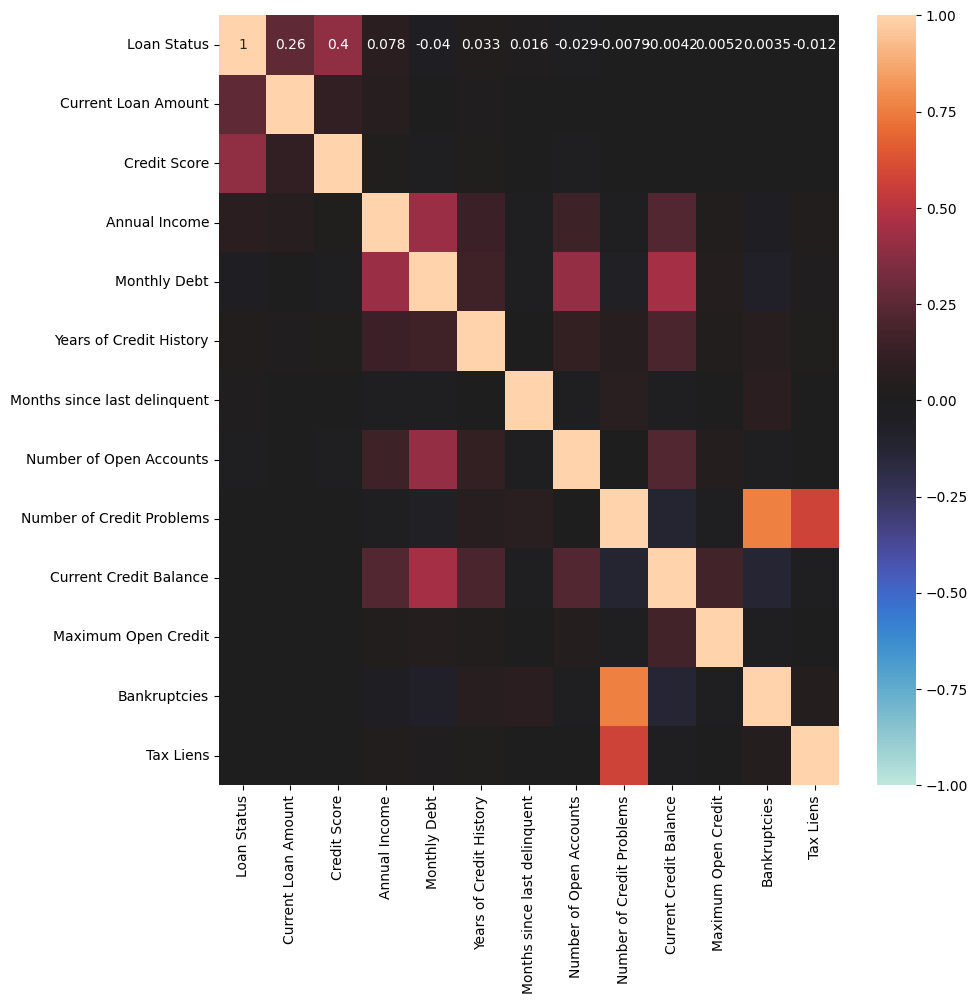

(<Axes: >, None)

In [64]:
visualizer.plotCorrelationHeatmap(df)

In [65]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Years in current job', 'Home Ownership', 'Annual Income', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [66]:
x = df[['Loan Status','Current Loan Amount', 'Term', 'Credit Score',
    'Home Ownership', 'Annual Income', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']]
x = pd.get_dummies(x, drop_first=True)
y = df[["Loan Status"]]

In [67]:
x.columns

Index(['Loan Status', 'Current Loan Amount', 'Credit Score', 'Annual Income',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Term_Short Term',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Educational Expenses',
       'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other',
       'Purpose_Take a Trip'],
      dtype='object')

In [68]:
x = x[['Current Loan Amount', 'Credit Score', 'Annual Income',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems',
       'Tax Liens', 'Term_Short Term',
       'Home Ownership_Home Mortgage',
       'Home Ownership_Rent', 'Purpose_Buy a Car',
       'Purpose_Home Improvements']]

In [69]:
trainer.fitAndPredictAll(myAlgorithmArray, x, y)

Classifier                    Accuracy Score    Precision Score
--------------------------  ----------------  -----------------
GaussianNB                          0.449328           0.799379
BernoulliNB                         0.744498           0.811243
KNeighborsClassifier                0.707921           0.691145
LogisticRegression                  0.741429           0.780364
DecisionTreeClassifier              0.751135           0.760541
RandomForestClassifier              0.8287             0.826835
GradientBoostingClassifier          0.755631           0.7541
